In [27]:
import cv2
import torch
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import re

# Load the pre-trained TrOCR model and processor
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-stage1")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-stage1")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

def preprocess_image(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    return thresh

def extract_math_expression(image):
    pil_image = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    pixel_values = processor(images=pil_image, return_tensors="pt").pixel_values.to(device)
    generated_ids = model.generate(pixel_values)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    return generated_text

def parse_and_evaluate_expression(text):
    # Replace 'x' with '*' for multiplication and ':' with '/' for division
    text = text.replace('x', '*').replace(':', '/')
    # Remove any spaces
    text = text.replace(' ', '')
    
    # Use regex to extract numbers and operators
    elements = re.findall(r'\d+|\+|\-|\*|/', text)
    
    # Reconstruct the expression
    expression = ''.join(elements)
    
    try:
        # Evaluate the expression
        result = eval(expression)
        return expression, result
    except:
        return expression, "Error: Unable to evaluate expression"

# Load an image
image_path = 'C:/Users/joana/OneDrive/Desktop/HSLU/3rd_semester/CV/c_vision_ocr/data/img_eight.png'  # Replace with the actual path
image = cv2.imread(image_path)

if image is None:
    raise ValueError("Image not found or could not be loaded")

preprocessed_image = preprocess_image(image)
extracted_text = extract_math_expression(preprocessed_image)
expression, result = parse_and_evaluate_expression(extracted_text)

print("Extracted mathematical expression:", expression)
print("Result of the operation:", result)

# Display the original image
cv2.imshow('Original Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-stage1 and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Extracted mathematical expression: -6
Result of the operation: -6


In [1]:
import pandas as pd

In [6]:
df = pd.read_csv("C:/Users/joana/OneDrive/Desktop/HSLU/3rd_semester/CV/c_vision_ocr/streamlit_app/error_reports.csv")

In [7]:
df

,timestamp,model_text,corrected_text,image
0,2024-10-20 21:24:51.204549,452 x9,452x9,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
1,2024-10-20 21:36:43.717364,26 2 + 513,262+513,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
2,2024-10-20 22:01:20.734758,26 2 + 513,262 + 513,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
3,2024-10-20 22:12:56.029239,26 2 + 513,262+513,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
4,2024-10-22 23:03:14.442394,45 x + 2,45 x 72,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
5,2024-10-23 20:53:51.957843,4 70 / 12,470 / 72,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
6,2024-10-25 15:18:36.302595,( 3 x 6 ) x ( 14 - 8 ) + 3,( 3 x 6 ) x ( 14 - 8 ) + 3,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...


In [17]:
print(df.columns)

Index(['timestamp', 'model_text', 'corrected_text', 'image'], dtype='object')


In [19]:
df["timestamp"] = df["timestamp"].apply(lambda x: x.split('.')[0])

In [20]:
df

,timestamp,model_text,corrected_text,image
0,2024-10-20 21:24:51,452 x9,452x9,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
1,2024-10-20 21:36:43,26 2 + 513,262+513,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
2,2024-10-20 22:01:20,26 2 + 513,262 + 513,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
3,2024-10-20 22:12:56,26 2 + 513,262+513,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
4,2024-10-22 23:03:14,45 x + 2,45 x 72,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...


In [21]:
df.to_csv("error_rep.csv")

In [24]:
df

,timestamp,model_text,corrected_text,image
0,2024-10-20 21:24:51,452 x9,452x9,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
1,2024-10-20 21:36:43,26 2 + 513,262+513,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
2,2024-10-20 22:01:20,26 2 + 513,262 + 513,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
3,2024-10-20 22:12:56,26 2 + 513,262+513,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...
4,2024-10-22 23:03:14,45 x + 2,45 x 72,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...


In [46]:
import base64
from io import BytesIO
from PIL import Image, UnidentifiedImageError
import matplotlib.pyplot as plt



Error decoding image: cannot identify image file <_io.BytesIO object at 0x0000017C5D2E1A30>
Failed to display image


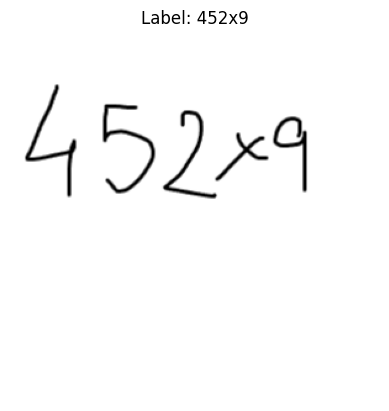

Model text: 452 x9
Corrected text: 452x9


In [48]:
import io


def read_image_from_csv(row):
    try:
        # Read the image data as bytes
        img_bytes = row['image']
        
        # Convert bytes to image
        img = Image.open(io.BytesIO(img_bytes))
        
        return img
    except Exception as e:
        print(f"Error reading image: {e}")
        return None

# Read the CSV file
df = pd.read_csv('C:/Users/joana/OneDrive/Desktop/HSLU/3rd_semester/CV/c_vision_ocr/streamlit_app/error_reports.csv', index_col=0)

# Convert the 'image' column from string to bytes
df['image'] = df['image'].apply(lambda x: eval(x))

# Display the image for a specific row (e.g., row 3)
img = read_image_from_csv(df.iloc[0])

if img is not None:
    plt.imshow(img)
    plt.title(f"Label: {df.iloc[0]['corrected_text']}")
    plt.axis('off')
    plt.show()
else:
    print("Failed to display image")

# Print other information
print(f"Model text: {df.iloc[0]['model_text']}")
print(f"Corrected text: {df.iloc[0]['corrected_text']}")

In [40]:
import ast

df = pd.read_csv('C:/Users/joana/OneDrive/Desktop/HSLU/3rd_semester/CV/c_vision_ocr/streamlit_app/error_reports.csv', index_col=0)
df['image'] = df['image'].apply(ast.literal_eval)

In [41]:
with open('test_image.png', 'wb') as f:
    f.write(df.iloc[3]['image'])

In [32]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

# Load the processor and model from the Hugging Face hub
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-large-stage1")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-large-stage1")

c:\Users\joana\.conda\envs\cv_proj\Lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-large-stage1 and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
# Specify the directory where you want to save the model and processor
save_directory = "./trocr-large-stage1-local"

# Save the processor and model to the specified directory
processor.save_pretrained(save_directory)
model.save_pretrained(save_directory)